In [2]:
from hepmc import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_hmc_traj(target, count=10, mass=10, steps=100, step_size=.01, start=[.4, .4], extent=None, ax=None, label=None):
    ndim = 2
    
    ### INITIALIZATION
    momentum_dist = densities.Gaussian(ndim, cov=mass)
    sampler = hamiltonian.HamiltonianUpdate(target, momentum_dist, 1, step_size)
    
    ### SIMULATION
    state = sampler.init_state(start)
    trajectories = []
    states = [state]
    rejected = []
    for i in range(count):
        q = np.array(state, subok=False)
        p = sampler.p_dist.proposal()
        state.momentum = p
        trajectory = [q]
        for j in range(steps):
            q, p = sampler.simulate(q, p)
            trajectory.append(q)
        trajectories.append(np.array(trajectory))
        next_state = hamiltonian.HamiltonState(q, momentum=p, pdf=target.pdf(q))
        accept = sampler.accept(state, next_state)
        r = np.random.rand()
        if r < accept:
            state = next_state
            states.append(state)
        else:
            rq = next_state.pdf/state.pdf
            rp = sampler.p_dist.pdf(next_state.momentum)/sampler.p_dist.pdf(state.momentum)
            print('%f * %f = %f' % (rq, rp, rp*rq), '; %f > %f' % (r, accept))
            rejected.append(next_state)

    # turn into np arrays
    states = np.array(states)
    rejected = np.array(rejected)
    
    ### PLOTTING
    if ax is None:
        ax=plt.gca()
        
    ax.set_title((label + ') ' if label is not None else '') + 
                 'steps: %s' % steps + 
                 ', mass: %s' % mass + 
                 ', step size: %s' % step_size)
    # plot pdf
    bins = 1000
    if extent is None:
        bound_max = np.max(trajectories)
        bound_min = np.min(trajectories)
        x_max = y_max = bound_max + (bound_max - bound_min) *.1
        x_min = y_min = bound_min - (bound_max - bound_min) *.1
    else:
        (x_min, x_max), (y_min, y_max) = extent
    x = np.linspace(x_min, x_max, bins)
    y = np.linspace(y_min, y_max, bins)
    mgrid = np.meshgrid(x, y)
    ax.imshow(target(*mgrid), origin='lower', extent=(x_min, x_max, y_min, y_max), cmap='inferno', alpha=0.2)

    # plot trajectory
    for traj in trajectories:
        line, = ax.plot(*traj.transpose(), '--', color='C0')
    line.set_label('trajectory')
    ax.plot(*states.transpose(), 's', color='#00BD33', label='accepted')
    if len(rejected) != 0:
        ax.plot(*rejected.transpose(), 'x', color='red', label='rejected')
    ax.grid(color='white')
    ax.legend(loc='best')

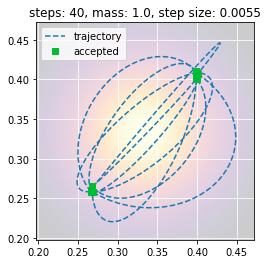

In [37]:
# test
target = densities.Gaussian(2, [1/3, 1/3], cov=0.1**2/2)
# target = densities.Camel(2)
plot_hmc_traj(target, mass=1., step_size=.0055, steps=40)

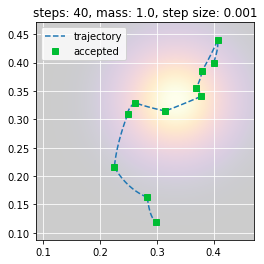

In [30]:
# test
target = densities.Gaussian(2, [1/3, 1/3], cov=0.1**2/2)
# target = densities.Camel(2)
plot_hmc_traj(target, mass=1., step_size=.001, steps=40)

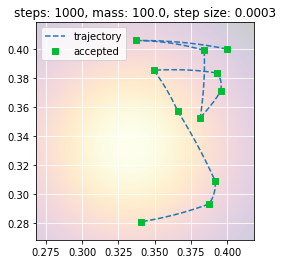

In [4]:
# test
target = densities.Gaussian(2, [1/3, 1/3], cov=0.1**2/2)
plot_hmc_traj(target, mass=100., step_size=0.0003, steps=1000)

In [399]:
target = densities.Camel(2)
%matplotlib inline

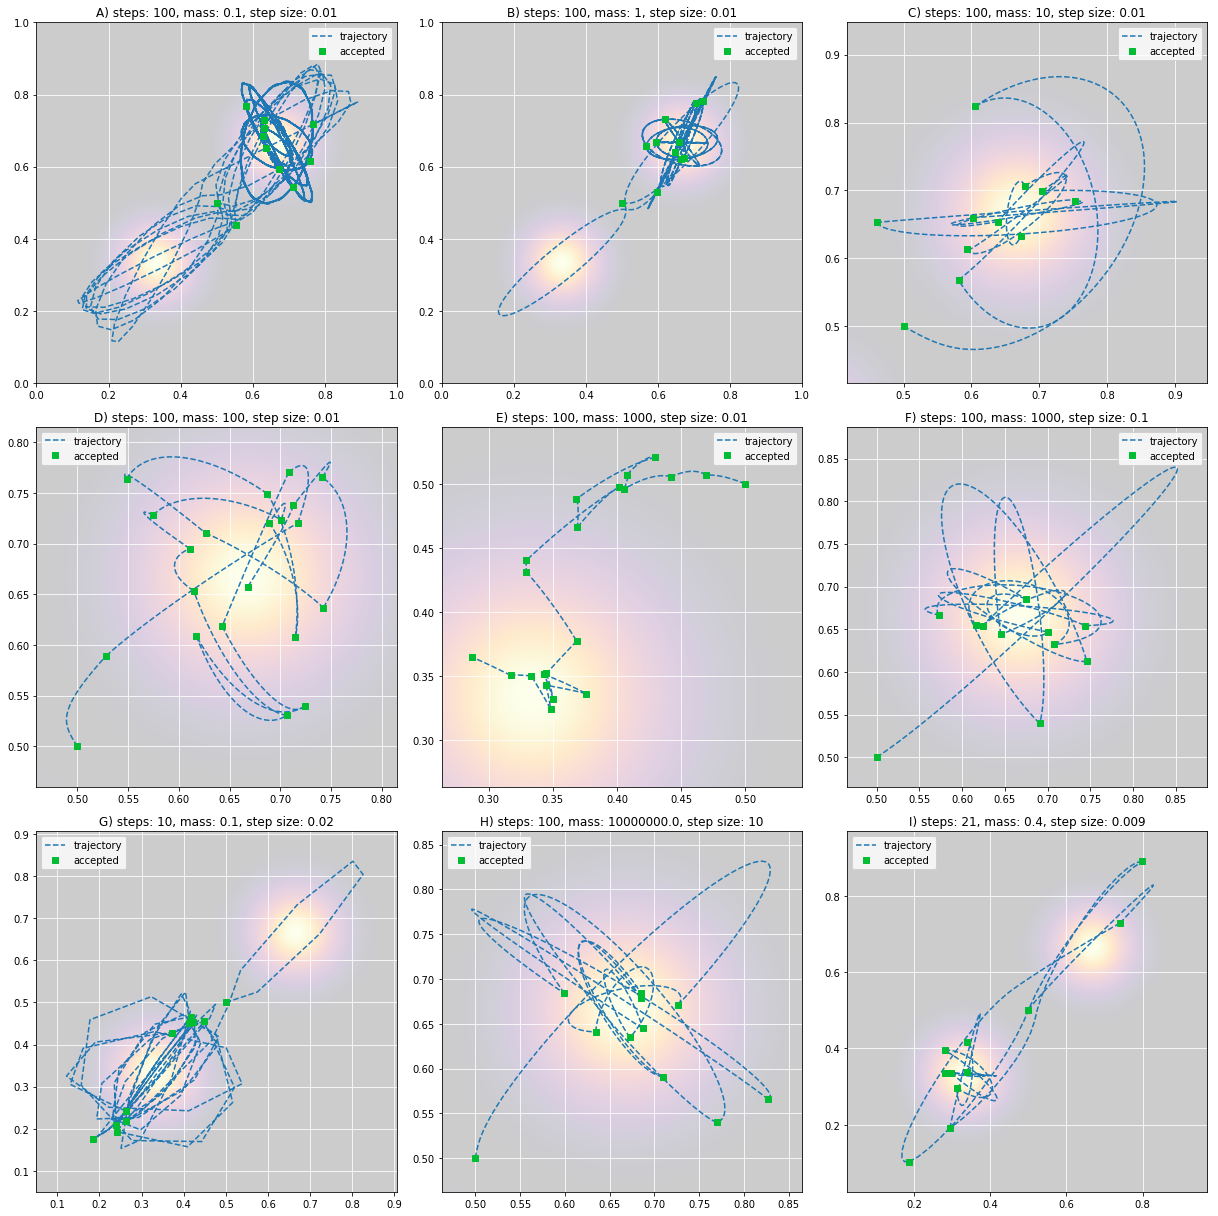

In [322]:
np.random.seed(1234)

plt.figure(figsize=(17, 17))

### mass plots
plt.subplot(331)
plot_hmc_traj(target, mass=.1, start=[.5,.5], extent=((0, 1), (0, 1)), label='A')

plt.subplot(332)
plot_hmc_traj(target, mass=1, start=[.5,.5], extent=((0, 1), (0, 1)), label='B')

plt.subplot(333)
plot_hmc_traj(target, mass=10, start=[.5,.5], label='C')

plt.subplot(334)
plot_hmc_traj(target, mass=100, count=20, start=[.5,.5], label='D')

plt.subplot(335)
plot_hmc_traj(target, mass=1000, count=20, start=[.5,.5], label='E')

plt.subplot(336)
plot_hmc_traj(target, mass=1000, step_size=.1, count=10, start=[.5,.5], label='F')

plt.subplot(337)
plot_hmc_traj(target, mass=.1, step_size=.02, steps=10, count=10, start=[.5,.5], label='G')

plt.subplot(338)
plot_hmc_traj(target, mass=1e7, step_size=10, count=10, start=[.5,.5], label='H')

plt.subplot(339)
plot_hmc_traj(target, mass=.4, step_size=.009, steps=21, count=10, start=[.5,.5], label='I')
plt.tight_layout()

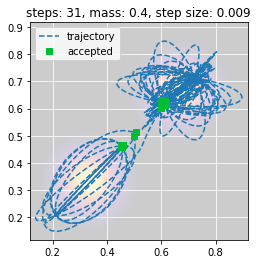

In [264]:
np.random.seed(12)
plot_hmc_traj(target, mass=.4, step_size=.009, steps=31, count=50, start=[.5,.5])

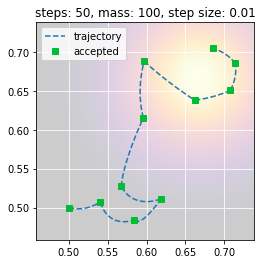

In [408]:
plot_hmc_traj(target, mass=100, step_size=0.01, steps=50, count=10, start=[.5,.5])

In [411]:
target = densities.Banana(2)
%matplotlib inline

0.231410 * 3.138843 = 0.726358 ; 0.768031 > 0.726358


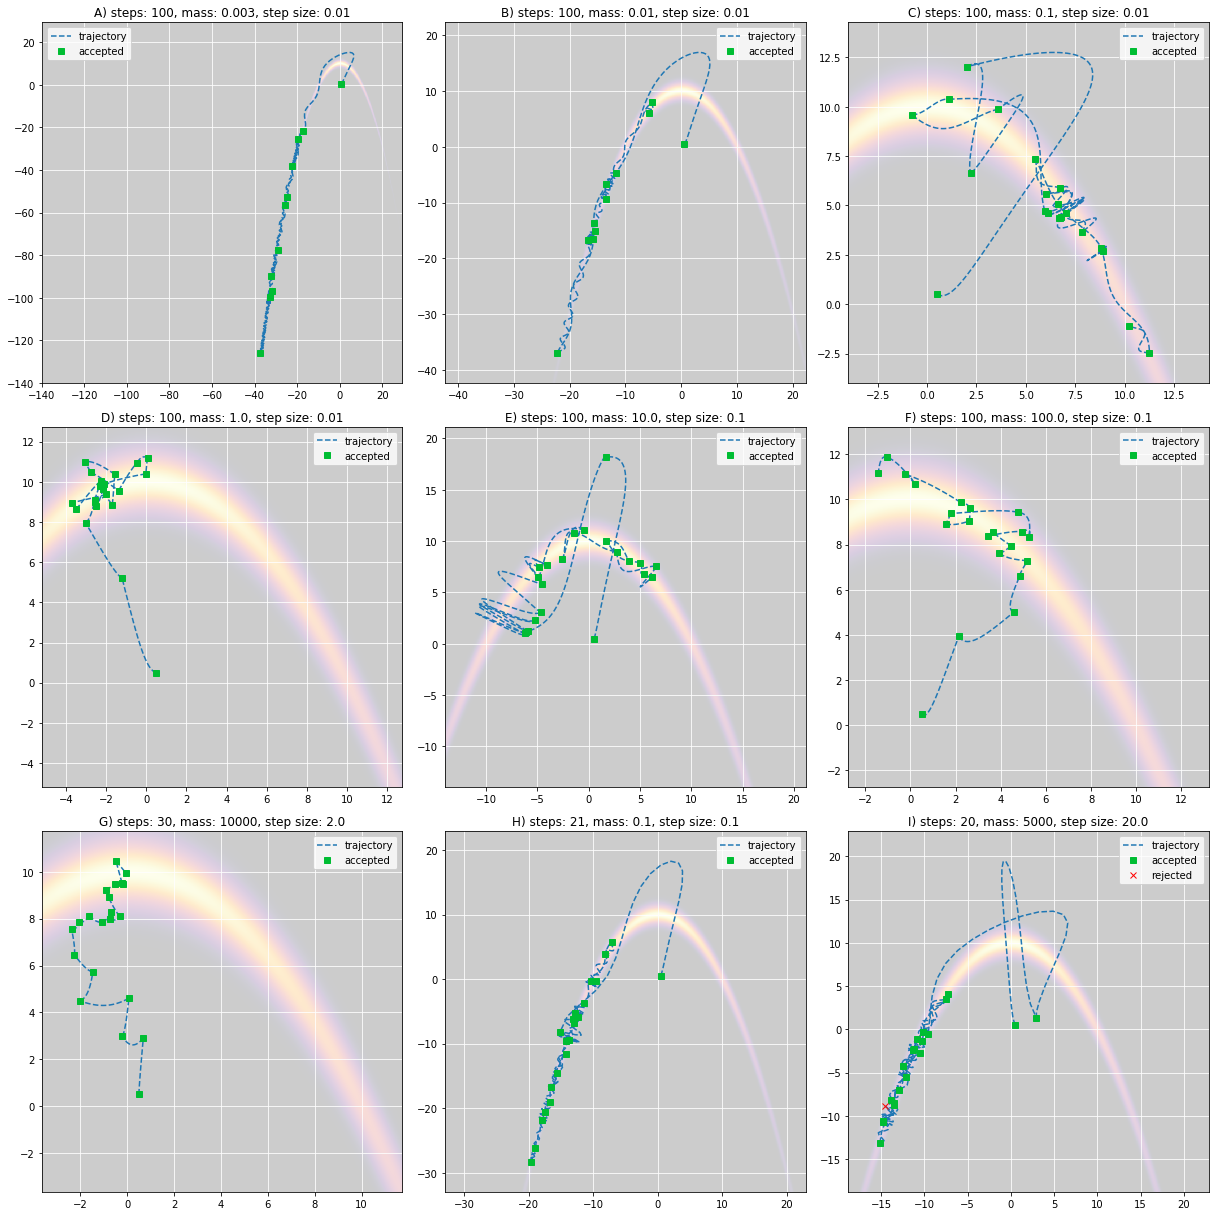

In [397]:
np.random.seed(1234)

plt.figure(figsize=(17, 17))

### mass plots
plt.subplot(331)
plot_hmc_traj(target, mass=.003, start=[.5,.5], label='A')

plt.subplot(332)
plot_hmc_traj(target, mass=.01, start=[.5,.5], label='B')

plt.subplot(333)
plot_hmc_traj(target, mass=.1, start=[.5,.5], count=20, label='C')

plt.subplot(334)
plot_hmc_traj(target, mass=1., count=20, start=[.5,.5], label='D')

plt.subplot(335)
plot_hmc_traj(target, mass=10., step_size=.1, count=20, start=[.5,.5], label='E')

plt.subplot(336)
plot_hmc_traj(target, mass=100., step_size=.1, count=20, start=[.5,.5], label='F')

plt.subplot(337)
plot_hmc_traj(target, mass=10000, step_size=2., steps=30, count=20, start=[.5,.5], label='G')

plt.subplot(338)
plot_hmc_traj(target, mass=.1, step_size=.1, steps=21, count=20, start=[.5,.5], label='H')

plt.subplot(339)
plot_hmc_traj(target, mass=5000, step_size=20., steps=20, count=20, start=[.5,.5], label='I')
plt.tight_layout()

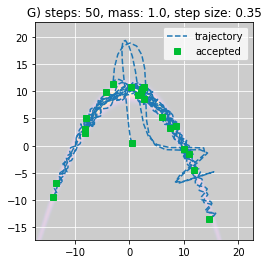

In [439]:
plot_hmc_traj(target, mass=1., step_size=0.35, steps=50, count=20, start=[.5,.5], label='G')